<a href="https://colab.research.google.com/github/nramelia2/DATA-SCIENTIST/blob/main/10%20CLASSIFICATION%20AND%20REGRESSION/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multiple Linear Regression

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset
dataset = pd.read_csv("happines2019.csv")

In [ ]:
dataset.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
new_names = {'Social support':'social_suport', 'Healthy life expectancy':'healthy_life_expectancy', 'GDP per capita':'GDP_per_capita', 'Freedom to make life choices':'Freedom_to_make_life_choices', 'Perceptions of corruption':'Perceptions_of_corruption'}

In [ ]:
dataset.rename(columns=new_names, inplace=True)
dataset.head()

,Overall rank,Country or region,Score,GDP_per_capita,social_suport,healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
x = dataset[['GDP_per_capita', 'social_suport', 'healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']]
y = dataset['Score']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
#Fitting the Multiple Linear Regression model
from sklearn import linear_model
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  1.7891941454280893
Coefficients:


[('GDP_per_capita', 0.6078134879981638),
 ('social_suport', 1.217493776950823),
 ('healthy_life_expectancy', 1.2424315269134207),
 ('Freedom_to_make_life_choices', 1.1175064490141458),
 ('Generosity', 0.3543100422572157),
 ('Perceptions_of_corruption', 1.5877091467344342)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [5.41581721 6.19078958 4.43913638 7.00667105 4.25339679 4.11144137
 4.52930805 7.18419041 3.6355611  5.9656846  5.75528971 5.69017071
 5.53100998 6.28124113 4.71664095 5.22865615 5.8095928  6.24312601
 5.90619955 4.40275727 6.33255588 6.230621   4.48659412 4.50414156
 5.9200752  3.26898852 4.98554004 6.37272183 6.45679096 5.4686475
 4.87391771 5.48363702]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
45,6.100,5.415817
11,7.167,6.190790
122,4.466,4.439136
15,7.021,7.006671
127,4.390,4.253397


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 77.60
Mean Absolute Error: 0.42535677451746945
Mean Square Error: 0.32579996998550964
Root Mean Square Error: 0.5707889014211031


### Suppport Vector Regression (SVR)

In [ ]:
cdf = dataset[['Score','GDP_per_capita', 'social_suport', 'healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']]
cdf.head(10)

,Score,GDP_per_capita,social_suport,healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,7.246,1.376,1.475,1.016,0.532,0.244,0.226


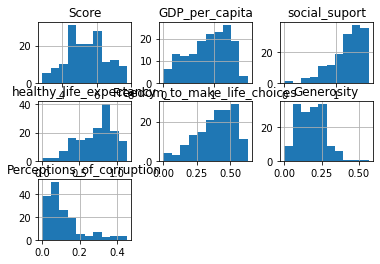

In [ ]:
viz = cdf[['Score', 'GDP_per_capita', 'social_suport', 'healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']]
viz.hist()
plt.show()

In [ ]:
# Variabel independen (regressor)
X = cdf.social_suport.values
# Variabel dependen
y = cdf.Score.values
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
y = np.ravel(y)

In [ ]:
y

array([ 2.12871112,  1.97639663,  1.93493825,  1.8808621 ,  1.87545448,
        1.86824433,  1.74477045,  1.71232476,  1.68618796,  1.65734734,
        1.6411245 ,  1.58614708,  1.56091154,  1.51674935,  1.48430366,
        1.45456178,  1.42211609,  1.3662374 ,  1.33829806,  1.30224729,
        1.27791302,  1.18868737,  1.07062111,  1.06791731,  0.93633201,
        0.93452947,  0.92731932,  0.8723419 ,  0.87144063,  0.85341524,
        0.82367336,  0.80474671,  0.79843782,  0.77049848,  0.76238706,
        0.73534898,  0.71371852,  0.71281725,  0.70740964,  0.69839695,
        0.69118679,  0.66865506,  0.6470246 ,  0.64071572,  0.62899922,
        0.62449287,  0.61187511,  0.5974548 ,  0.57582434,  0.55960149,
        0.55329261,  0.54157611,  0.48028981,  0.43973269,  0.43793016,
        0.43522635,  0.43342381,  0.43162127,  0.40818827,  0.36222355,
        0.33518547,  0.31625882,  0.30273978,  0.28020805,  0.2612814 ,
        0.25767632,  0.22162556,  0.21711921,  0.20179763,  0.17

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
#linear = Linear Kernel
regressor.fit(X, y)

SVR(kernel='linear')

In [ ]:
# Predicting a new result

y_pred = regressor.predict(sc_X.transform(np.array([[5.4]])))
#To transform 5.4 to the scaled X value, we first need to convert it into the array form
#Since the transform method of StandardScaler Library only accepts arrays

y_pred = sc_y.inverse_transform(y_pred)
#Now the prediction gives us the scaled value of y
#Thus we need inverse transformation of the scaled value for the real results

print(y_pred)

[17.47187601]


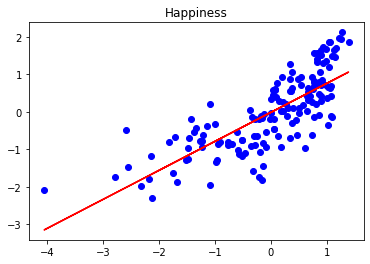

In [ ]:
# Visualising the SVR results
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Happiness')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['social_suport']])
test_y = np.asanyarray(cdf[['Score']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

mae  = np.mean(np.absolute(test_y_ - test_y))
mse  = np.mean((test_y_ - test_y) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.absolute((test_y_ - test_y)/test_y_))

print("Mean absolute error (MAE): %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("Mean Precentage Absolute Error (MAPE): %.2f" % mape)
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error (MAE): 1.13
Residual sum of squares (MSE): 1.97
Root Mean Squared Error (RMSE): 1.40
Mean Precentage Absolute Error (MAPE): 0.23
R2-score: 0.34


### Non-Linear Regression

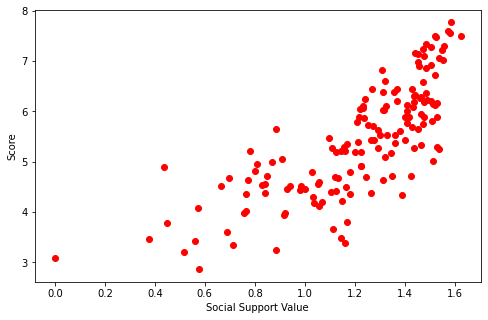

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (dataset["social_suport"].values, dataset["Score"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Score')
plt.xlabel('Social Support Value')
plt.show()

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

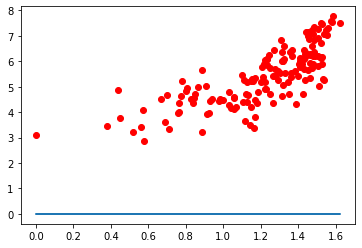

In [ ]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [ ]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 2.661323, beta_2 = 0.424573


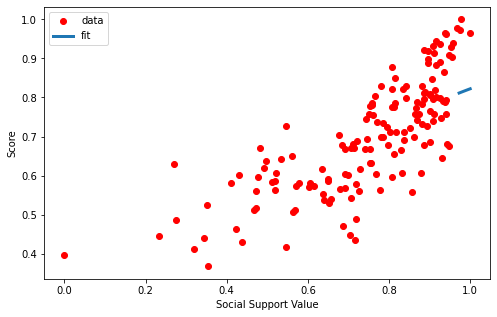

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Social Support Value')
plt.show()